In [1]:
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [2]:
import os 
import shutil

directory_list = [
    '../dataset/train/',
    '../dataset/test/',
]

for dir in directory_list:
    os.makedirs(dir)

In [3]:
from bing_image_downloader.bing_image_downloader import downloader

downloader.download(query= '마동석', limit= 50, output_dir= './', adult_filter_off= True, force_replace= False, timeout= 60)
downloader.download(query= '카리나', limit= 50, output_dir= './', adult_filter_off= True, force_replace= False, timeout= 60)
downloader.download(query= '이수지', limit= 50, output_dir= './', adult_filter_off= True, force_replace= False, timeout= 60)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://image.xportsnews.com/contents/images/upload/article/2022/1128/1669621507974521.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://cdn.mhnse.com/news/photo/202305/185023_185270_5154.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://entertainimg.kbsmedia.co.kr/cms/uploads/PERSON_20240206075441_1b54f931528a9d36c98db236a5e19d74.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2021/07/26/68c2d7a2-2306-4cb6-8602-bc8783572906.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img.sbs.co.kr/newsnet/etv/upload/2022/11/17/30000804350_1280.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img1.daumcdn.net/thumb/R1280x0/?fname=http://t1.daumcdn.net/brunch/service/user/b9D6/image/Q63ycvIfFoVR-2uSeJ1gq49sMkE.jpg)
[Error] Invalid image, not saving https://img1.daumcdn.net/thumb/R

In [5]:
os.listdir('카리나')

['image_1.jpg',
 'image_10.jpg',
 'image_11.jpg',
 'image_12.jpg',
 'image_13.jpg',
 'image_14.jpg',
 'image_15.jpg',
 'image_16.jpg',
 'image_17.jpg',
 'image_18.jpg',
 'image_19.jpg',
 'image_2.jpg',
 'image_20.png',
 'image_21.jpg',
 'image_22.jpg',
 'image_23.jpg',
 'image_24.jpg',
 'image_25.jpg',
 'image_26.jpg',
 'image_27.jpg',
 'image_28.jpg',
 'image_29.jpg',
 'image_3.jpg',
 'image_30.jpg',
 'image_31.jpg',
 'image_32.jpg',
 'image_33.jpg',
 'image_34.jpg',
 'image_35.jpg',
 'image_36.jpg',
 'image_37.jpeg',
 'image_38.jpeg',
 'image_39.jpg',
 'image_4.jpg',
 'image_40.jpg',
 'image_41.jpg',
 'image_42.jpg',
 'image_43.jpg',
 'image_44.jpg',
 'image_45.jpg',
 'image_46.jpg',
 'image_47.jpg',
 'image_48.jpg',
 'image_49.jpg',
 'image_5.jpeg',
 'image_50.jpg',
 'image_6.jpeg',
 'image_7.jpg',
 'image_8.jpg',
 'image_9.jpg']

In [6]:
def dataset_split(query, train_cnt):        # 카리나 , 30
    for dir in directory_list:      # dir변수에는 directory_list 경로가 들어있다. 
        if not os.path.isdir(dir +'/'+ query):      # dir변수 경로에 query명 폴더가 없으면
            os.makedirs(dir + query)        # dir변수 경로에 query명 폴더를 만들어라.

    cnt = 0

    for file_name in os.listdir(query):
        if cnt < train_cnt:
            shutil.move(query + '/' + file_name, '../dataset/train/' + query + '/' + file_name)
        else: 
            shutil.move(query + '/' + file_name, '../dataset/test/' + query + '/' + file_name)

        cnt += 1

    shutil.rmtree(query)

dataset_split('카리나', 40)
dataset_split('마동석', 40)
dataset_split('이수지', 40)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

In [8]:
transforms_train = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p= 0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

transforms_test = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

train_datasets = datasets.ImageFolder(root= '../dataset/train', transform= transforms_train)
test_datasets = datasets.ImageFolder(root= '../dataset/test', transform= transforms_test)

In [39]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 119
    Root location: ../dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [9]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size= 4, shuffle= True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size= 4, shuffle= True)

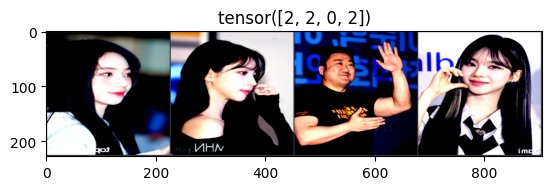

In [13]:
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.numpy().transpose([1, 2, 0])      # RGB 순서를 바꿔준다.

    mean = np.array([0.229, 0.224, 0.225])
    std = np.array([0.485, 0.456, 0.406])

    img = std * img + mean
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.title(title)
    plt.show()

images, labels = next(iter(train_dataloader))
images_data = torchvision.utils.make_grid(images)

imshow(images_data, labels)

In [28]:
train_datasets.classes

['마동석', '이수지', '카리나']

In [10]:
model = models.resnet34(pretrained= True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(in_features=512, out_features=3, bias=True)

c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
from tensorboardX import SummaryWriter
import tqdm

writer = SummaryWriter()
optimizer = optim.Adam(model.parameters(), lr= 1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 50
step = 0

device = 'cuda' if torch.cuda.is_available else 'cpu'
model.to(device)

for epoch in range(epochs):
    for data, labels in tqdm.tqdm(train_dataloader):
        optimizer.zero_grad()
        pred = model(data.to(device))
        loss = criterion(pred, labels.to(device))
        writer.add_scalar('Loss/train', loss.item(), step)
        loss.backward()
        optimizer.step()
        step += 1

    print('loss', loss.item())

100%|██████████| 30/30 [00:10<00:00,  2.81it/s]


loss 0.8406029939651489


100%|██████████| 30/30 [00:05<00:00,  5.85it/s]


loss 0.5394517779350281


100%|██████████| 30/30 [00:04<00:00,  6.27it/s]


loss 0.5028479099273682


100%|██████████| 30/30 [00:05<00:00,  5.19it/s]


loss 0.8936693668365479


100%|██████████| 30/30 [00:05<00:00,  5.29it/s]


loss 0.6310467720031738


100%|██████████| 30/30 [00:05<00:00,  5.15it/s]


loss 0.2559967041015625


100%|██████████| 30/30 [00:05<00:00,  5.37it/s]


loss 0.5161635875701904


100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


loss 0.4211602210998535


100%|██████████| 30/30 [00:05<00:00,  5.02it/s]


loss 0.2823285758495331


100%|██████████| 30/30 [00:06<00:00,  4.69it/s]


loss 1.111494541168213


100%|██████████| 30/30 [00:05<00:00,  5.02it/s]


loss 0.3557301163673401


100%|██████████| 30/30 [00:05<00:00,  5.78it/s]


loss 0.5881034731864929


100%|██████████| 30/30 [00:05<00:00,  5.45it/s]


loss 0.5453057885169983


100%|██████████| 30/30 [00:05<00:00,  5.27it/s]


loss 0.31748664379119873


100%|██████████| 30/30 [00:04<00:00,  6.53it/s]


loss 0.1090332418680191


100%|██████████| 30/30 [00:04<00:00,  6.39it/s]


loss 0.3958582878112793


100%|██████████| 30/30 [00:05<00:00,  5.64it/s]


loss 0.23703771829605103


100%|██████████| 30/30 [00:05<00:00,  5.08it/s]


loss 0.10974273085594177


100%|██████████| 30/30 [00:04<00:00,  6.04it/s]


loss 0.5479909777641296


100%|██████████| 30/30 [00:05<00:00,  5.71it/s]


loss 0.7570014595985413


100%|██████████| 30/30 [00:05<00:00,  5.98it/s]


loss 0.24849951267242432


100%|██████████| 30/30 [00:05<00:00,  5.57it/s]


loss 0.16317978501319885


100%|██████████| 30/30 [00:05<00:00,  5.25it/s]


loss 0.11689206212759018


100%|██████████| 30/30 [00:05<00:00,  5.34it/s]


loss 0.07103320956230164


100%|██████████| 30/30 [00:05<00:00,  5.70it/s]


loss 1.1367968320846558


100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


loss 0.13031530380249023


100%|██████████| 30/30 [00:05<00:00,  5.37it/s]


loss 0.186140775680542


100%|██████████| 30/30 [00:05<00:00,  5.46it/s]


loss 0.05340992659330368


100%|██████████| 30/30 [00:05<00:00,  5.90it/s]


loss 0.1902974247932434


100%|██████████| 30/30 [00:05<00:00,  5.19it/s]


loss 0.33926382660865784


100%|██████████| 30/30 [00:05<00:00,  5.06it/s]


loss 0.19003592431545258


100%|██████████| 30/30 [00:06<00:00,  4.85it/s]


loss 0.3254457712173462


100%|██████████| 30/30 [00:06<00:00,  4.83it/s]


loss 0.08114372193813324


100%|██████████| 30/30 [00:05<00:00,  5.14it/s]


loss 0.0694507360458374


100%|██████████| 30/30 [00:05<00:00,  5.79it/s]


loss 1.2899525165557861


100%|██████████| 30/30 [00:05<00:00,  5.77it/s]


loss 0.10303415358066559


100%|██████████| 30/30 [00:05<00:00,  5.57it/s]


loss 0.0566151961684227


100%|██████████| 30/30 [00:06<00:00,  4.89it/s]


loss 0.025824766606092453


100%|██████████| 30/30 [00:05<00:00,  5.22it/s]


loss 0.14205628633499146


100%|██████████| 30/30 [00:05<00:00,  5.06it/s]


loss 0.9207857251167297


100%|██████████| 30/30 [00:05<00:00,  5.10it/s]


loss 0.4578421413898468


100%|██████████| 30/30 [00:06<00:00,  4.97it/s]


loss 0.36497312784194946


100%|██████████| 30/30 [00:05<00:00,  5.45it/s]


loss 0.021792300045490265


100%|██████████| 30/30 [00:05<00:00,  5.38it/s]


loss 0.20804204046726227


100%|██████████| 30/30 [00:05<00:00,  5.96it/s]


loss 0.5590455532073975


100%|██████████| 30/30 [00:05<00:00,  5.64it/s]


loss 0.22173567116260529


100%|██████████| 30/30 [00:06<00:00,  4.57it/s]


loss 0.12068047374486923


100%|██████████| 30/30 [00:06<00:00,  4.41it/s]


loss 0.0508330874145031


100%|██████████| 30/30 [00:05<00:00,  5.16it/s]


loss 0.10179579257965088


100%|██████████| 30/30 [00:06<00:00,  4.65it/s]

loss 0.061317458748817444


예측 결과: tensor([0, 0, 1, 0], device='cuda:0'), 정답: tensor([0, 0, 1, 0])


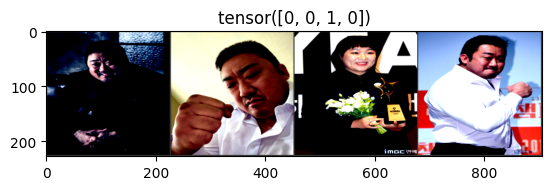

예측 결과: tensor([0, 2, 2, 0], device='cuda:0'), 정답: tensor([0, 2, 2, 0])


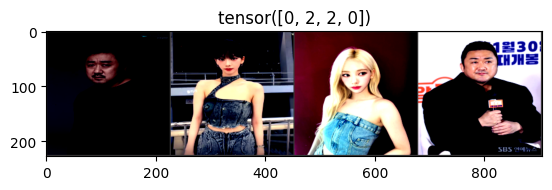

예측 결과: tensor([2, 0, 2, 1], device='cuda:0'), 정답: tensor([2, 0, 2, 1])


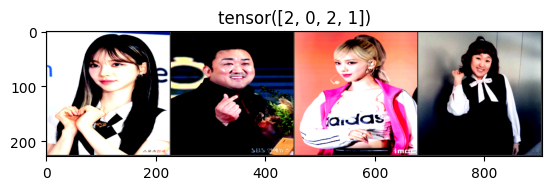

예측 결과: tensor([0, 1, 1, 1], device='cuda:0'), 정답: tensor([0, 1, 1, 1])


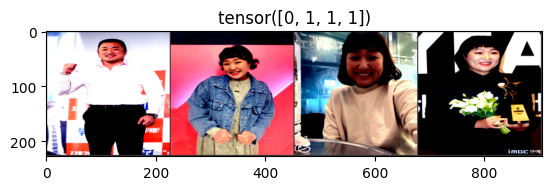

예측 결과: tensor([2, 0, 1, 1], device='cuda:0'), 정답: tensor([2, 0, 1, 1])


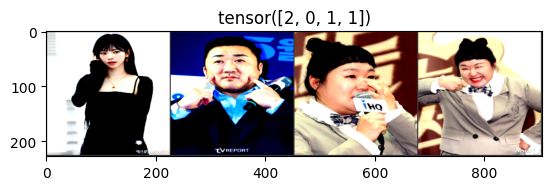

예측 결과: tensor([1, 2, 0, 0], device='cuda:0'), 정답: tensor([1, 2, 0, 0])


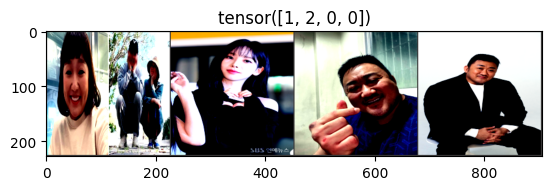

예측 결과: tensor([2, 2, 2, 1], device='cuda:0'), 정답: tensor([2, 2, 2, 1])


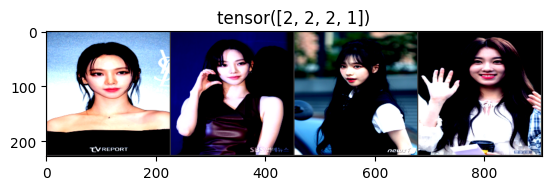

예측 결과: tensor([1, 2], device='cuda:0'), 정답: tensor([1, 2])


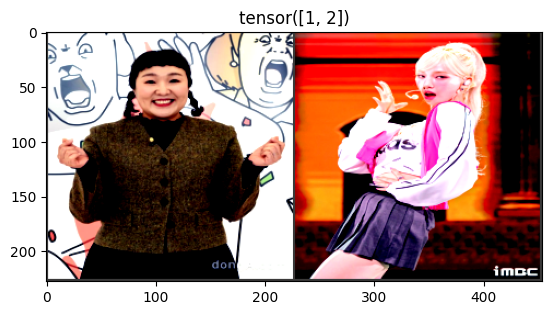

최종 정확도:  tensor([0.1000, 0.1333], device='cuda:0')


In [14]:
model.eval()
with torch.no_grad():
    for data, label in test_dataloader:
        pred = model(data.to(device))
        pred = torch.max(pred, 1)[1]

        total_pred = pred + torch.sum(pred == label.to(device).data)

        print(f'예측 결과: {pred}, 정답: {label}')
        images_data = torchvision.utils.make_grid(data)
        imshow(images_data.to('cpu'), label)

print('최종 정확도: ', total_pred/len(test_datasets))

In [17]:
from PIL import Image

image = Image.open('C:/DL/dataset/test/카리나/image_5.jpeg')
image = transforms_test(image).unsqueeze(0).to(device)

result = model(image)
result

tensor([[-3.4044, -1.7021,  2.7920]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [18]:
import torch

correct = 0
total = 0


with torch.no_grad():
    for data, label in test_dataloader:
        data, label = data.to(device), label.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)

        correct += (predicted == label).sum().item()
        total += label.size(0)

print(f'최종 정확도: {100 * correct / total:.2f}%')


최종 정확도: 100.00%


In [19]:
torch.save(model.state_dict(), 'mymodel.pth')

In [20]:
torch.save(model, 'my_model1.pth')

In [ ]:
train_datasets.imgs

# CNN계열의 모델을 사용해서 학습시키고 최종결과를 검증 데이터를 기반으로 정확도가 얼마나 나오는 지 하고 F1 score 얼마나 나오는 지 뽑아서 디스코드 올리기
# 최종 데이터셋은 검증 데이터로
# F1 score 최고 점수
# 검증 데이터셋은 배치를 8로